# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [236]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [237]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] numpy 1.24.3
[OK] matplotlib 3.5.1
[OK] torch 2.5.1+cpu


# Chapter 12: Parallelizing Neural Network Training with PyTorch (Part 1/2)


- [PyTorch and training performance](#PyTorch-and-training-performance)
  - [Performance challenges](#Performance-challenges)
  - [What is PyTorch?](#What-is-PyTorch?)
  - [How we will learn PyTorch](#How-we-will-learn-PyTorch)
- [First steps with PyTorch](#First-steps-with-PyTorch)
  - [Installing PyTorch](#Installing-PyTorch)
  - [Creating tensors in PyTorch](#Creating-tensors-in-PyTorch)
  - [Manipulating the data type and shape of a tensor](#Manipulating-the-data-type-and-shape-of-a-tensor)
  - [Applying mathematical operations to tensors](#Applying-mathematical-operations-to-tensors)
  - [Split, stack, and concatenate tensors](#Split,-stack,-and-concatenate-tensors)
- [Summary](#summary)

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [238]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image as IPythonImage
%matplotlib inline

## PyTorch and training performance

### Performance challenges

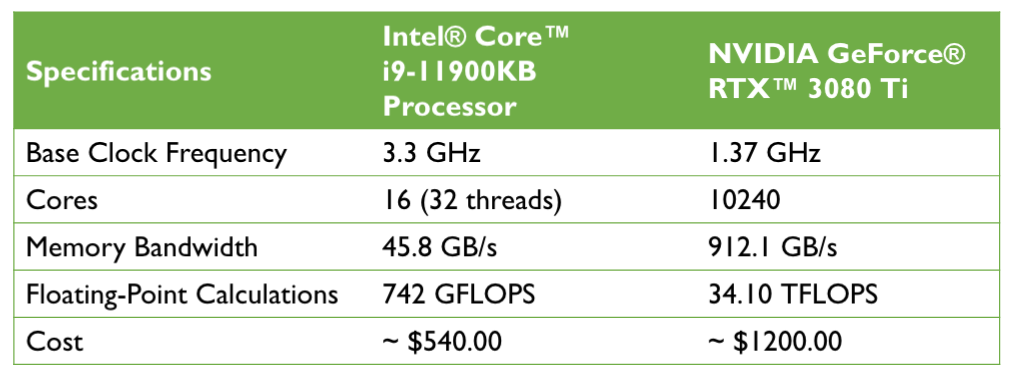

In [239]:
# * IPythonImage(...)
# Use the IPythonImage class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/12_01.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/12_01.png', which is a relative path to the current directory.
# * width=500
# Set the image width to 500 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/12_01.png', width=500)

### What is PyTorch?

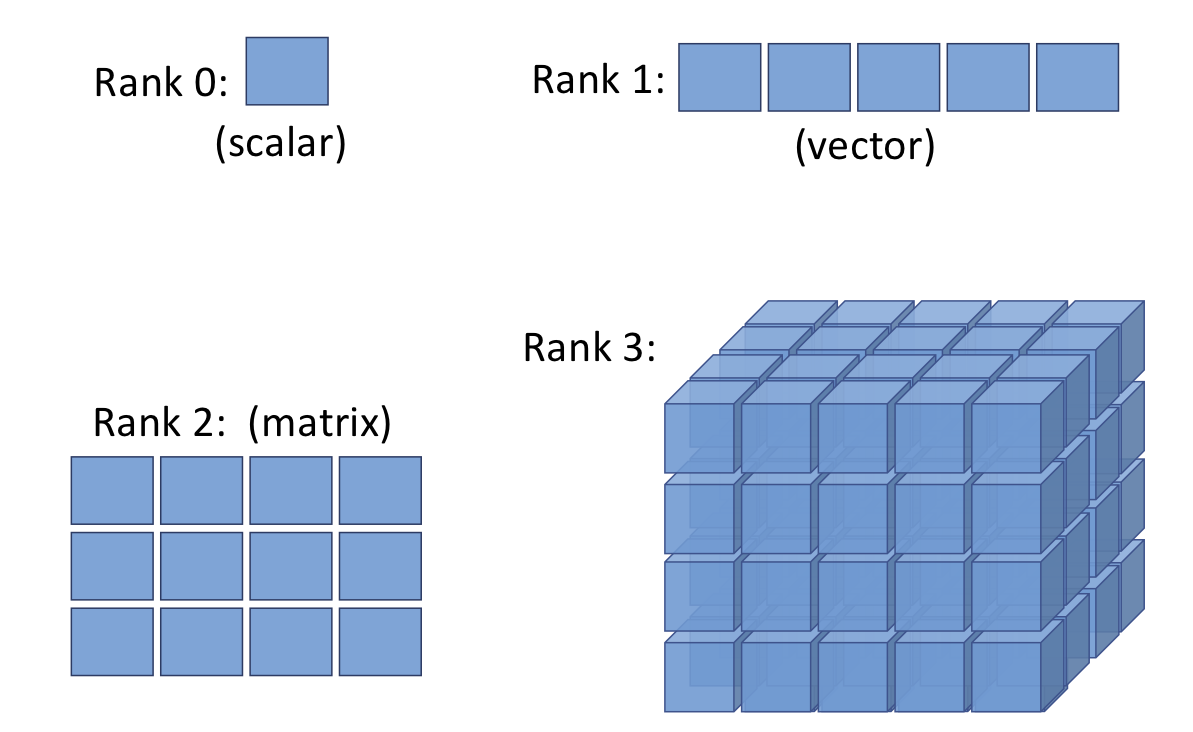

In [240]:
# * IPythonImage(...)
# Use the IPythonImage class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/12_02.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/12_02.png', which is a relative path to the current directory.
# * width=500
# Set the image width to 500 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/12_02.png', width=500)

### How we will learn PyTorch

## First steps with PyTorch

### Installing PyTorch

In [241]:
# ! pip install torch==1.9.0 torchvision==0.10.0

# CUDA 11.8
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# CPU
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [242]:
import torch
print('PyTorch version:', torch.__version__)

PyTorch version: 2.5.1+cpu


In [243]:
! python -c 'import torch; print(torch.__version__)'

2.5.1+cpu


### Creating tensors in PyTorch

Now, let’s consider a few different ways of creating tensors, and then see some of their properties and
how to manipulate them. Firstly, we can simply create a tensor from a list or a NumPy array using the
torch.tensor or the torch.from_numpy function as follows:

In [244]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


This resulted in tensors t_a and t_b, with their properties, shape=(3,) and dtype=int32, adopted
from their source. Similar to NumPy arrays, we can also see these properties:

In [245]:
t_ones = torch.ones(2, 3)
t_ones.shape

torch.Size([2, 3])

In [246]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


Finally, creating a tensor of random values can be done as follows:

In [247]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6826, 0.3051, 0.4635],
        [0.4550, 0.5725, 0.4980]])


In [248]:
# torch.is_tensor(a), torch.is_tensor(t_a)

### Manipulating the data type and shape of a tensor

The torch.to() function can be used to change the data type of a tensor to a desired type:

In [249]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


Transposing a tensor:

In [250]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


Reshaping a tensor (for example, from a 1D vector to a 2D array):

In [251]:
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):

In [252]:
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying mathematical operations to tensors

First, let’s instantiate two random tensors, one with uniform distribution in the range [–1, 1) and the
other with a standard normal distribution:

In [253]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

Note that torch.rand returns a tensor filled with random numbers from a uniform distribution in
the range of [0, 1).

Notice that t1 and t2 have the same shape. Now, to compute the element-wise product of t1 and t2,
we can use the following:

In [254]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


To compute the mean, sum, and standard deviation along a certain axis (or axes), we can use torch.
mean(), torch.sum(), and torch.std(). For example, the mean of each column in t1 can be com-
puted as follows:

In [255]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


The matrix-matrix product between t1 and t2 (that is, t1 × t2^T, where the superscript T is for transpose)
can be computed by using the torch.matmul() function as follows:

In [256]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


On the other hand, computing t1^T × t2 is performed by transposing t1, resulting in an array of size 2×2:

In [257]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


Finally, the torch.linalg.norm() function is useful for computing the L^p norm of a tensor. For example, we can calculate the L² norm of t1 as follows:

In [258]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


To verify that this code snippet computes the L² norm of t1 correctly, you can compare the results with
the following NumPy function:

In [259]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### Split, stack, and concatenate tensors

Providing the number of splits:

In this example, a tensor of size 6 was divided into a list of three tensors each with size 2. If the
tensor size is not divisible by the chunks value, the last chunk will be smaller.

In [260]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [261]:
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

Providing the sizes of different splits:

Alternatively, instead of defining the number of splits, we can also specify the sizes of the
output tensors directly. Here, we are splitting a tensor of size 5 into tensors of sizes 3 and 2:

In [262]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [263]:
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

Sometimes, we are working with multiple tensors and need to concatenate or stack them to create a
single tensor. In this case, PyTorch functions such as torch.stack() and torch.cat() come in handy.
For example, let’s create a 1D tensor, A, containing 1s with size 3, and a 1D tensor, B, containing 0s
with size 2, and concatenate them into a 1D tensor, C, of size 5:

In [264]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


If we create 1D tensors A and B, both with size 3, then we can stack them together to form a 2D
tensor, S:

In [265]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch

### Creating a PyTorch DataLoader from existing tensors

If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily
create a dataset loader using the torch.utils.data.DataLoader() class. It returns an object of the
DataLoader class, which we can use to iterate through the individual elements in the input dataset. As
a simple example, consider the following code, which creates a dataset from a list of values from 0 to 5:

In [266]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

We can easily iterate through a dataset entry by entry as follows:

In [267]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this with the
batch_size argument as follows:

In [268]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


This will create two batches from this dataset, where the first three elements go into batch #1, and
the remaining elements go into batch #2. The optional drop_last argument is useful for cases when
the number of elements in the tensor is not divisible by the desired batch size. We can drop the last
non-full batch by setting drop_last to True. The default value for drop_last is False.

### Combining two tensors into a joint dataset

Assume that we have two tensors, t_x and t_y. Tensor t_x holds our feature values, each of size 3, and
t_y stores the class labels. For this example, we first create these two tensors as follows:

In [269]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

Now, we want to create a joint dataset from these two tensors. We first need to create a Dataset class as follows:

A custom Dataset class must contain the following methods to be used by the data loader later on:

- __init__(): This is where the initial logic happens, such as reading existing arrays, loading a
file, filtering data, and so forth.

- __getitem__(): This returns the corresponding sample to the given index.

In [270]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

Then we create a joint dataset of t_x and t_y with the custom Dataset class as follows:

In [271]:
joint_dataset = JointDataset(t_x, t_y)

Finally, we can print each example of the joint dataset as follows:

In [272]:
for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


We can also simply utilize the torch.utils.data.TensorDataset class, if the second dataset is a labeled
dataset in the form of tensors. So, instead of using our self-defined Dataset class, JointDataset, we
can create a joint dataset as follows:

In [273]:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

### Shuffle, batch, and repeat

First, let’s create a shuffled version data loader from the joint_dataset dataset:

In [274]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

Here, each batch contains two data records (x) and the corresponding labels (y). Now we iterate through
the data loader entry by entry as follows:

In [275]:
for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


The rows are shuffled without losing the one-to-one correspondence between the entries in x and y.

In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset
by the desired number of epochs. So, let’s iterate over the batched dataset twice:

In [276]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


This results in two different sets of batches. In the first epoch, the first batch contains a pair of values
[y=1, y=2], and the second batch contains a pair of values [y=3, y=0]. In the second epoch, two
batches contain a pair of values, [y=2, y=0] and [y=1, y=3] respectively. For each iteration, the
elements within a batch are also shuffled.

### Creating a dataset from files on your local storage disk

Before we start, let’s take a look at the content of these files. We will use the pathlib library to gen-
erate a list of image files:

In [277]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

In [278]:
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Next, we will visualize these image examples using Matplotlib:

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


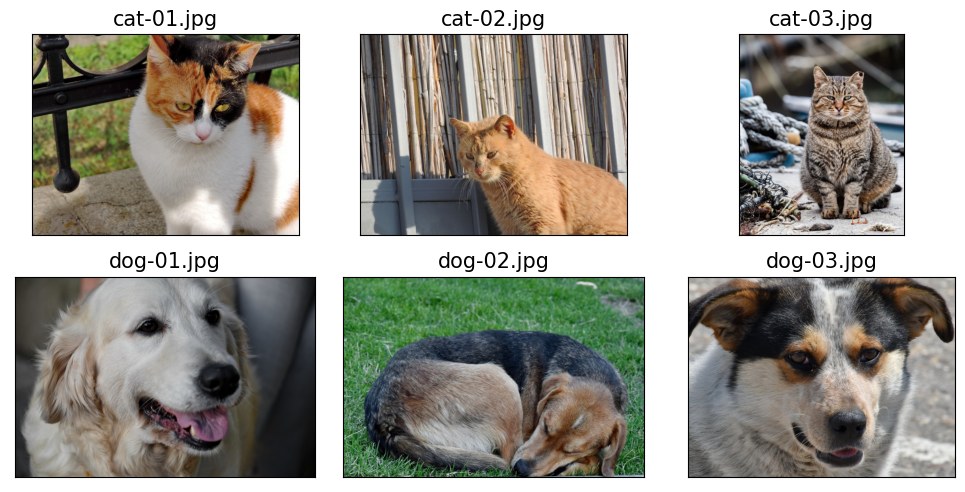

In [279]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

Another point to consider is that
the labels for these images are provided within their filenames. So, we extract these labels from the
list of filenames, assigning label 1 to dogs and label 0 to cats:

In [280]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels. In the pre-
vious section, you learned how to create a joint dataset from two arrays. Here, we will do the following:

In [281]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size, for example, 80×120. As mentioned before, we
use the torchvision.transforms module to resize the images and convert the loaded pixels into
tensors as follows:

In [282]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

Now we update the ImageDataset class with the transform we just defined:

In [283]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels, transform)

The __getitem__ method in the ImageDataset class wraps all four steps into a single function, including
the loading of the raw content (images and labels), decoding the images into tensors, and resizing the
images. The function then returns a dataset that we can iterate over and apply other operations that
we learned about in the previous sections via a data loader, such as shuffling and batching.

Finally, we visualize these transformed image examples using Matplotlib:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


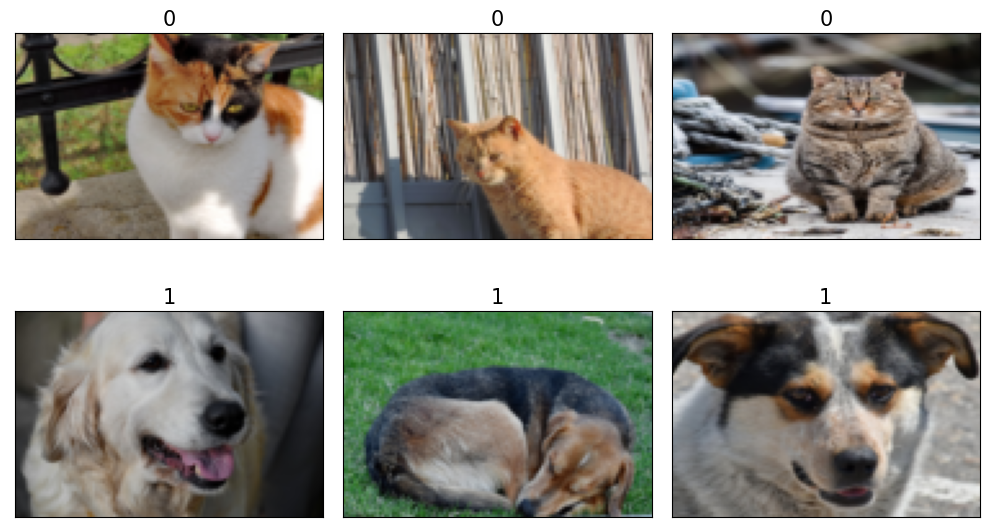

In [284]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
# plt.savefig('figures/12_04.pdf')
plt.show()

### Fetching available datasets from the torchvision.datasets library

First, if you haven’t already installed torchvision together with PyTorch earlier, you need to install
the torchvision library via pip from the command line:

In [285]:
# ! pip install torchvision

**Fetching CelebA dataset**

---

1. Downloading the image files manually

    - You can try setting `download=True` below. If this results in a `BadZipfile` error, we recommend downloading the `img_align_celeba.zip` file manually from http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html. In the Google Drive folder, you can find it under the `Img` folder as shown below:

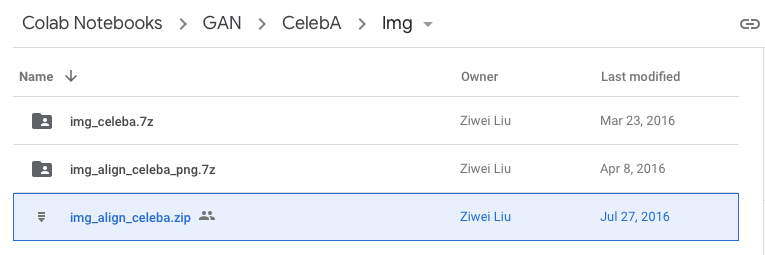

In [286]:
# * IPythonImage(...)
# Use the IPythonImage class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/gdrive-download-location-1.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/12_02.png', which is a relative path to the current directory.
# * width=500
# Set the image width to 500 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/gdrive-download-location-1.png', width=500)

- You can also try this direct  link: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
- After downloading, please put this file into the `./celeba` subolder and unzip it.

2. Next,  you need to download the annotation files and put them into the same `./celeba` subfolder. The annotation files can be found under `Anno`:

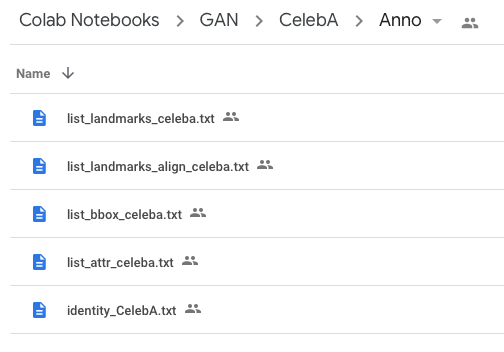

In [287]:
# * IPythonImage(...)
# Use the IPythonImage class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/gdrive-download-location-2.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/12_02.png', which is a relative path to the current directory.
# * width=300
# Set the image width to 300 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/gdrive-download-location-2.png', width=300)

- direct links are provided below:
  - [identity_CelebA.txt](https://drive.google.com/file/d/1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS/view?usp=sharing)
  - [list_attr_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=sharing&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q)
  - [list_bbox_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pbThiMVRxWXZ4dU0/view?usp=sharing&resourcekey=0-z-17UMo1wt4moRL2lu9D8A)
  - [list_landmarks_align_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pd0FJY3Blby1HUTQ/view?usp=sharing&resourcekey=0-aFtzLN5nfdhHXpAsgYA8_g)
  - [list_landmarks_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pTzJIdlJWdHczRlU/view?usp=sharing&resourcekey=0-49BtYuqFDomi-1v0vNVwrQ)

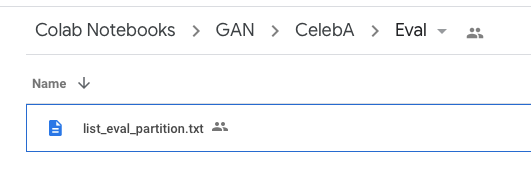

In [288]:
# * IPythonImage(...)
# Use the Image class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/gdrive-download-location-3.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/gdrive-download-location-3.png', which is a relative path to the current directory.
# * width=300
# Set the image width to 300 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/gdrive-download-location-3.png', width=300)

3. Lastly, you need to download the file `list_eval_partition.txt` and place it under `./celeba`:

- [list_eval_partition.txt](https://drive.google.com/file/d/0B7EVK8r0v71pY0NSMzRuSXJEVkk/view?usp=sharing&resourcekey=0-i4TGCi_51OtQ5K9FSp4EDg)

After completing steps 1-3 above, please ensure you have the following files in your `./celeba` subfolder, and the files are non-empty (that is, they have similar file sizes as shown below):

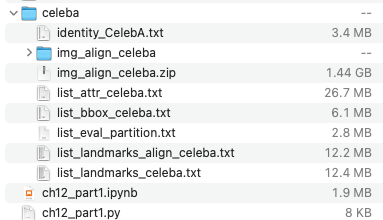

In [289]:
# * IPythonImage(...)
# Use the IPythonImage class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/celeba-files.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/celeba-files.png', which is a relative path to the current directory.
# * width=400
# Set the image width to 400 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

IPythonImage(filename='figures/celeba-files.png', width=400)

---

Next, we will call the torchvision.datasets.CelebA class to download the data, store it on disk in a
designated folder, and load it into a torch.utils.data.Dataset object:

In [290]:
# import torchvision
# image_path = './'
# celeba_dataset = torchvision.datasets.CelebA(
#     image_path, split='train', target_type='attr', download=True
# )

Now that we have instantiated the datasets, let’s check if the object is of the torch.utils.data.Dataset
class:

In [291]:
# assert isinstance(celeba_dataset, torch.utils.data.Dataset)

As mentioned, the dataset is already split into train, test, and validation datasets, and we only load the
train set. And we only use the 'attributes' target. In order to see what the data examples look like,
we can execute the following code:

In [292]:
# example = next(iter(celeba_dataset))
# print(example)

Note that the sample in this dataset comes in a tuple of (PIL.Image, attributes). If we want to pass
this dataset to a supervised deep learning model during training, we have to reformat it as a tuple of
(features tensor, label). For the label, we will use the 'Smiling' category from the attributes as
an example, which is the 31st element.

Finally, let’s take the first 18 examples from it to visualize them with their 'Smiling' labels:

In [293]:
# from itertools import islice
# fig = plt.figure(figsize=(12, 8))
# for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
#     ax = fig.add_subplot(3, 6, i+1)
#     ax.set_xticks([]); ax.set_yticks([])
#     ax.imshow(image)
#     ax.set_title(f'{attributes[31]}', size=15)
# plt.savefig('figures/12_05.pdf')
# plt.show()

Next, we will proceed with the second dataset from torchvision.datasets.MNIST (https://pytorch.org/vision/stable/datasets.html#mnist). Let’s see how it can be used to fetch the MNIST digit
dataset:

- The database has two partitions, 'train' and 'test'. We need to select a specific subset to load.

- The images are stored in PIL.Image format. And we can obtain a transformed version using a
custom transform function, such as transforms.ToTensor and transforms.Resize.

- There are 10 classes for the target, from 0 to 9.

Now, we can download the 'train' partition, convert the elements to tuples, and visualize 10 examples:

(<PIL.Image.Image image mode=L size=28x28 at 0x7DE85FF7FC10>, 5)


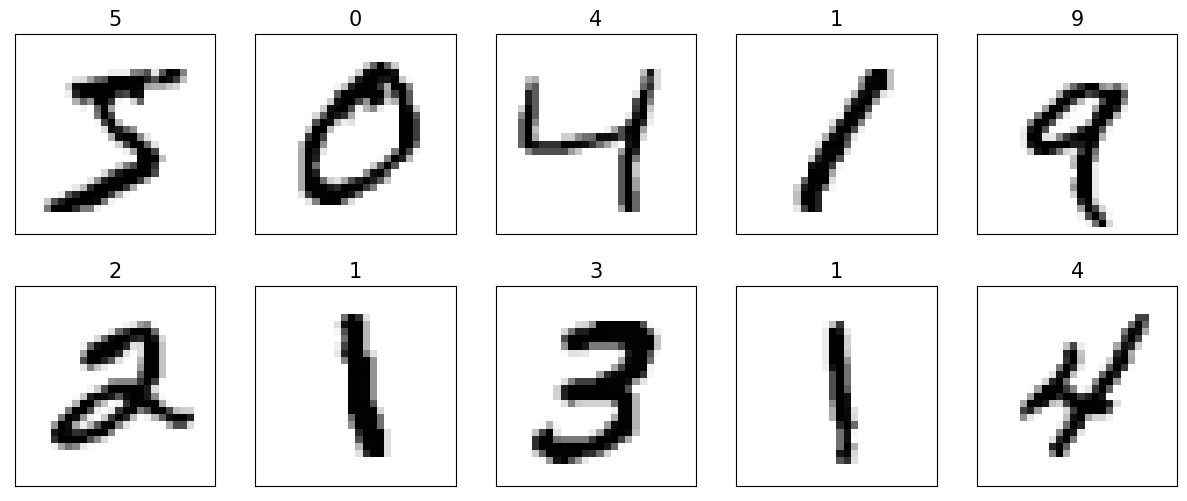

In [294]:
from itertools import islice
image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', 
download=False)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
# plt.savefig('figures/12_06.pdf')
plt.show()

# Summary

---

Readers may ignore the next cell.

In [295]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ch12_part1.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ch12_part1.ipynb.
# * --output ch12_part1.py
# This option tells the script to save the output (the converted file) with the name
# ch12_part1.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ch12_part1.ipynb --output ch12_part1.py

[NbConvertApp] Converting notebook ch12_part1.ipynb to script
[NbConvertApp] Writing 28391 bytes to ch12_part1.py
